# Motivation
Visualise the results of the VAS-SA experiment
we load the data saved in artifact in comet


In [19]:
settings.comet['project_name1'].lower()

'psm_mdof1'

In [127]:
from comet_ml import API
from io import StringIO

from config import settings
import pandas as pd

comet_api = API(api_key=settings.comet['api_key'])
experiments = comet_api.get(workspace=settings.comet['workspace'],
                            project_name='psm-mdof1')
aucs_list = []
i=0
for exp in experiments:
    asset = exp.get_asset_list()
    for a in asset:
        if a['fileName'] == 'aucs.csv':
            asset_data = exp.get_asset(a['assetId'])
            asset_data_str = asset_data.decode('utf-8')
            csv_file_like_object = StringIO(asset_data_str)
            df = pd.read_csv(csv_file_like_object)
            df.set_index('Unnamed: 0',inplace=True)
            # add a row for the experiment name
            df.loc['experiment_name'] = int(i)
            i+=1
            aucs_list.append(df)


In [130]:
aucs_list[1]

,system_0,system_1,system_2,system_3,system_4,system_5,system_6,system_7,system_8,system_9,system_10,system_11,system_12,system_13,system_14,system_15,system_16,system_17,system_18,system_19
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
harmonic_mean,0.837743,0.857296,0.850069,0.818871,0.846361,0.827567,0.866123,0.845853,0.821440,0.847235,0.803757,0.838557,0.819862,0.782318,0.820560,0.835445,0.854170,0.797178,0.824670,0.849813
mean,0.856171,0.869964,0.863485,0.840312,0.861020,0.846729,0.875485,0.855533,0.842599,0.860817,0.826160,0.853243,0.834414,0.809795,0.838944,0.852136,0.863327,0.819517,0.842224,0.864086
geometric_mean,0.828159,0.844123,0.837472,0.811333,0.834498,0.818621,0.850943,0.831364,0.813647,0.834833,0.797078,0.826921,0.808760,0.778717,0.811334,0.824971,0.839198,0.790667,0.814944,0.837745
weighted_auc_VAS,0.756005,0.779135,0.762570,0.742185,0.753412,0.746938,0.781064,0.755564,0.734906,0.770488,0.720190,0.752030,0.733952,0.704406,0.736416,0.755322,0.754423,0.708672,0.741430,0.772737
AUC_0.03,0.690025,0.881950,0.699950,0.777525,0.675900,0.849925,0.773100,0.936075,0.722350,0.893650,0.704275,0.841875,0.797050,0.621675,0.927050,0.889900,0.663575,0.795625,0.811575,0.933475
experiment_name,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
# load from each csv the columns system_1 and AUC_0.03
import numpy as np
df_s=[]
for system in range(0,20):
    system_name = f'system_{system}'
    df_s.append(np.stack([df[system_name].values for df in aucs_list]))

In [133]:
df_s[5][:,5]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42.])

mean correlation = 0.91


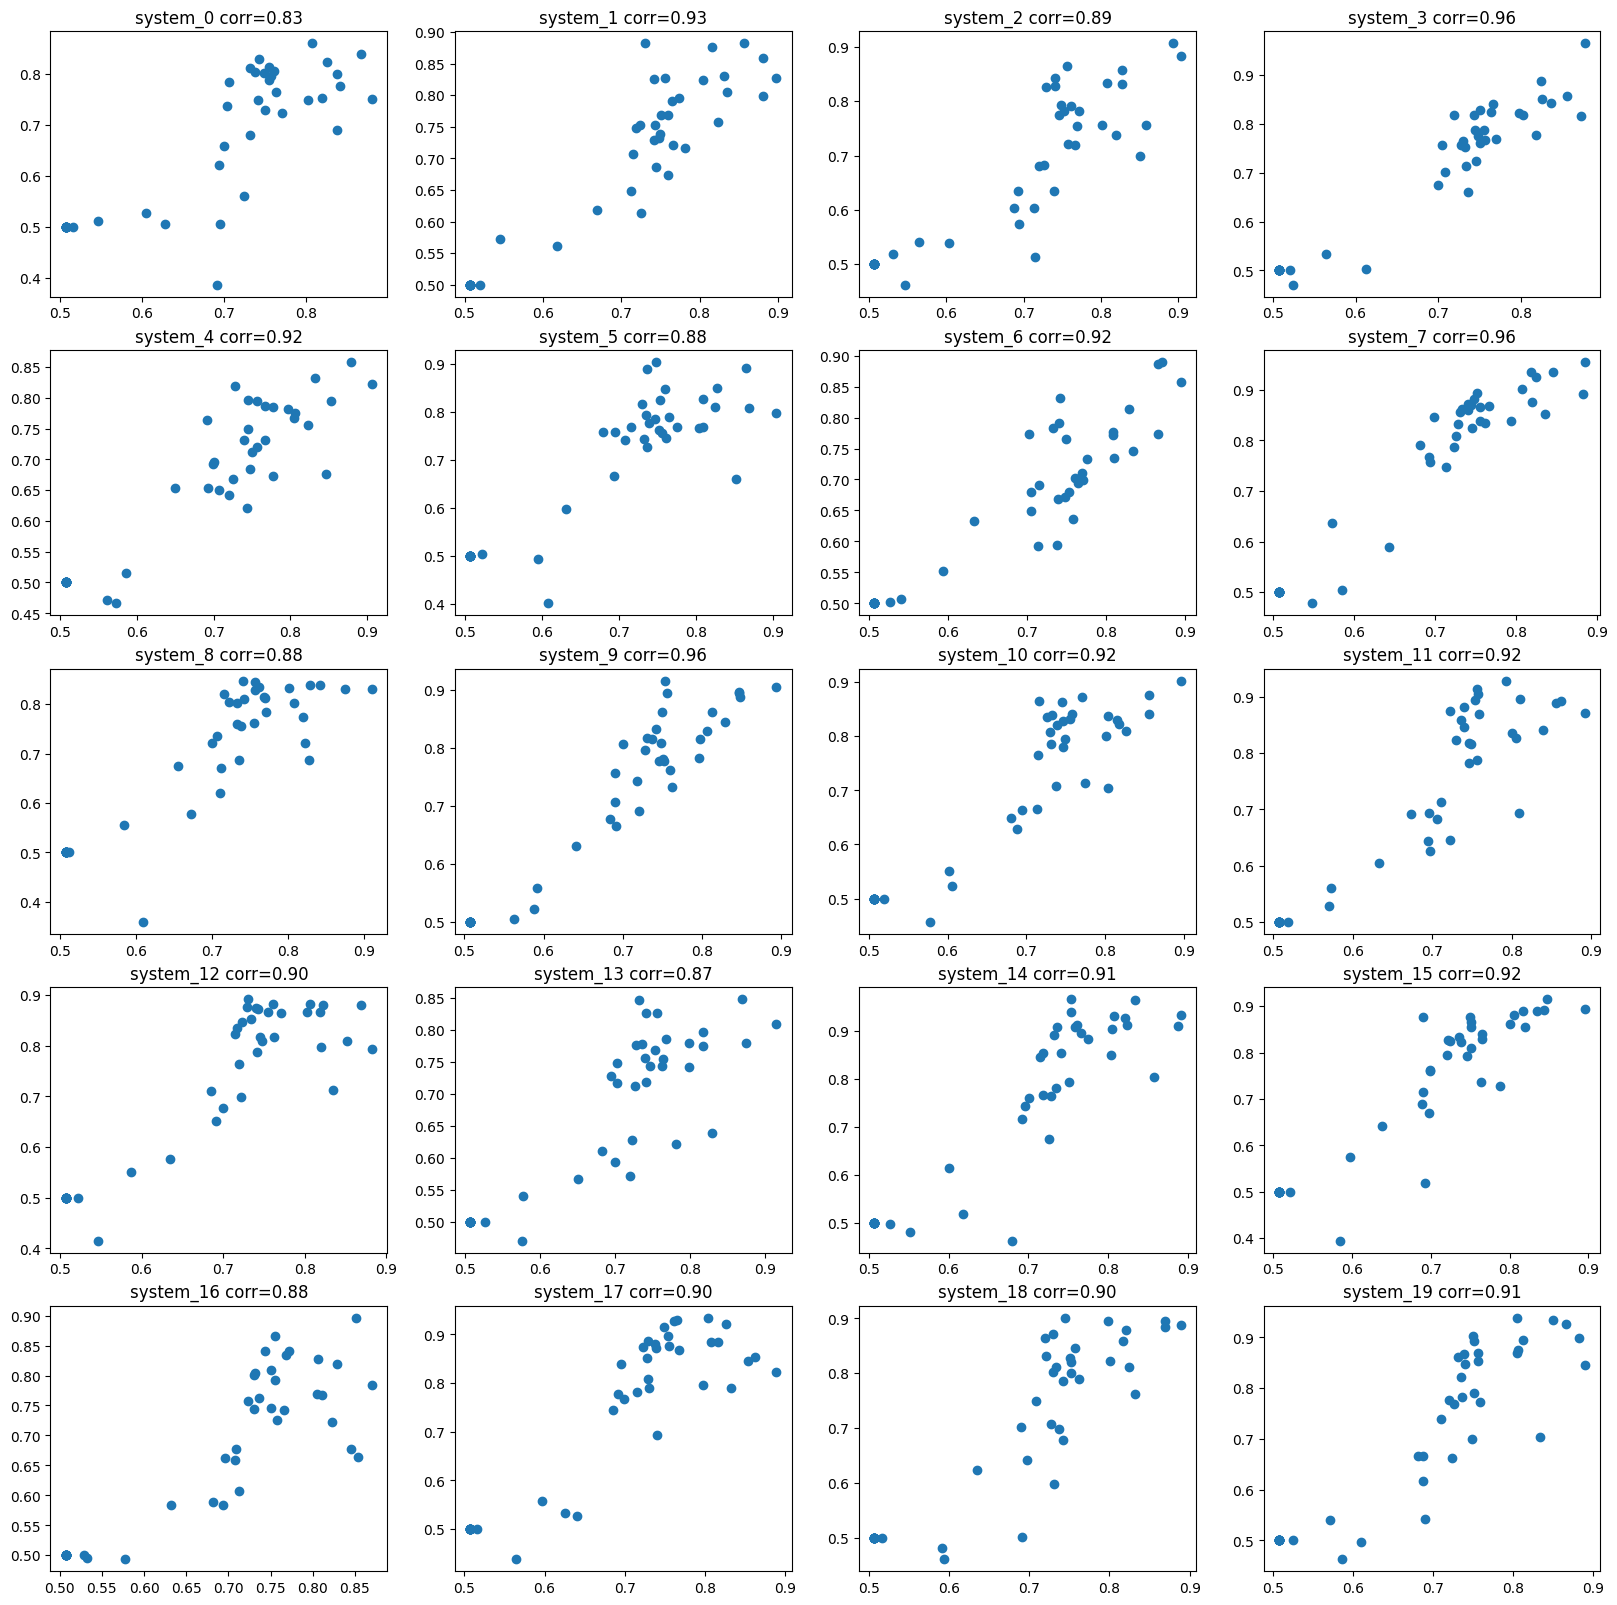

In [134]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=(20,20))
corr_list = []
for i in range(20):
    ax[i//4,i%4].scatter(df_s[i][:,0],df_s[i][:,4])
    # in title add the correlation between the two columns
    corr  = np.corrcoef(df_s[i][:,0],df_s[i][:,4])[0,1]
    ax[i//4,i%4].set_title(f'system_{i} corr={corr:.2f}')
    corr_list.append(corr)

# print the mean correlation
print(f'mean correlation = {np.mean(corr_list):.2f}')


mean correlation = 0.92


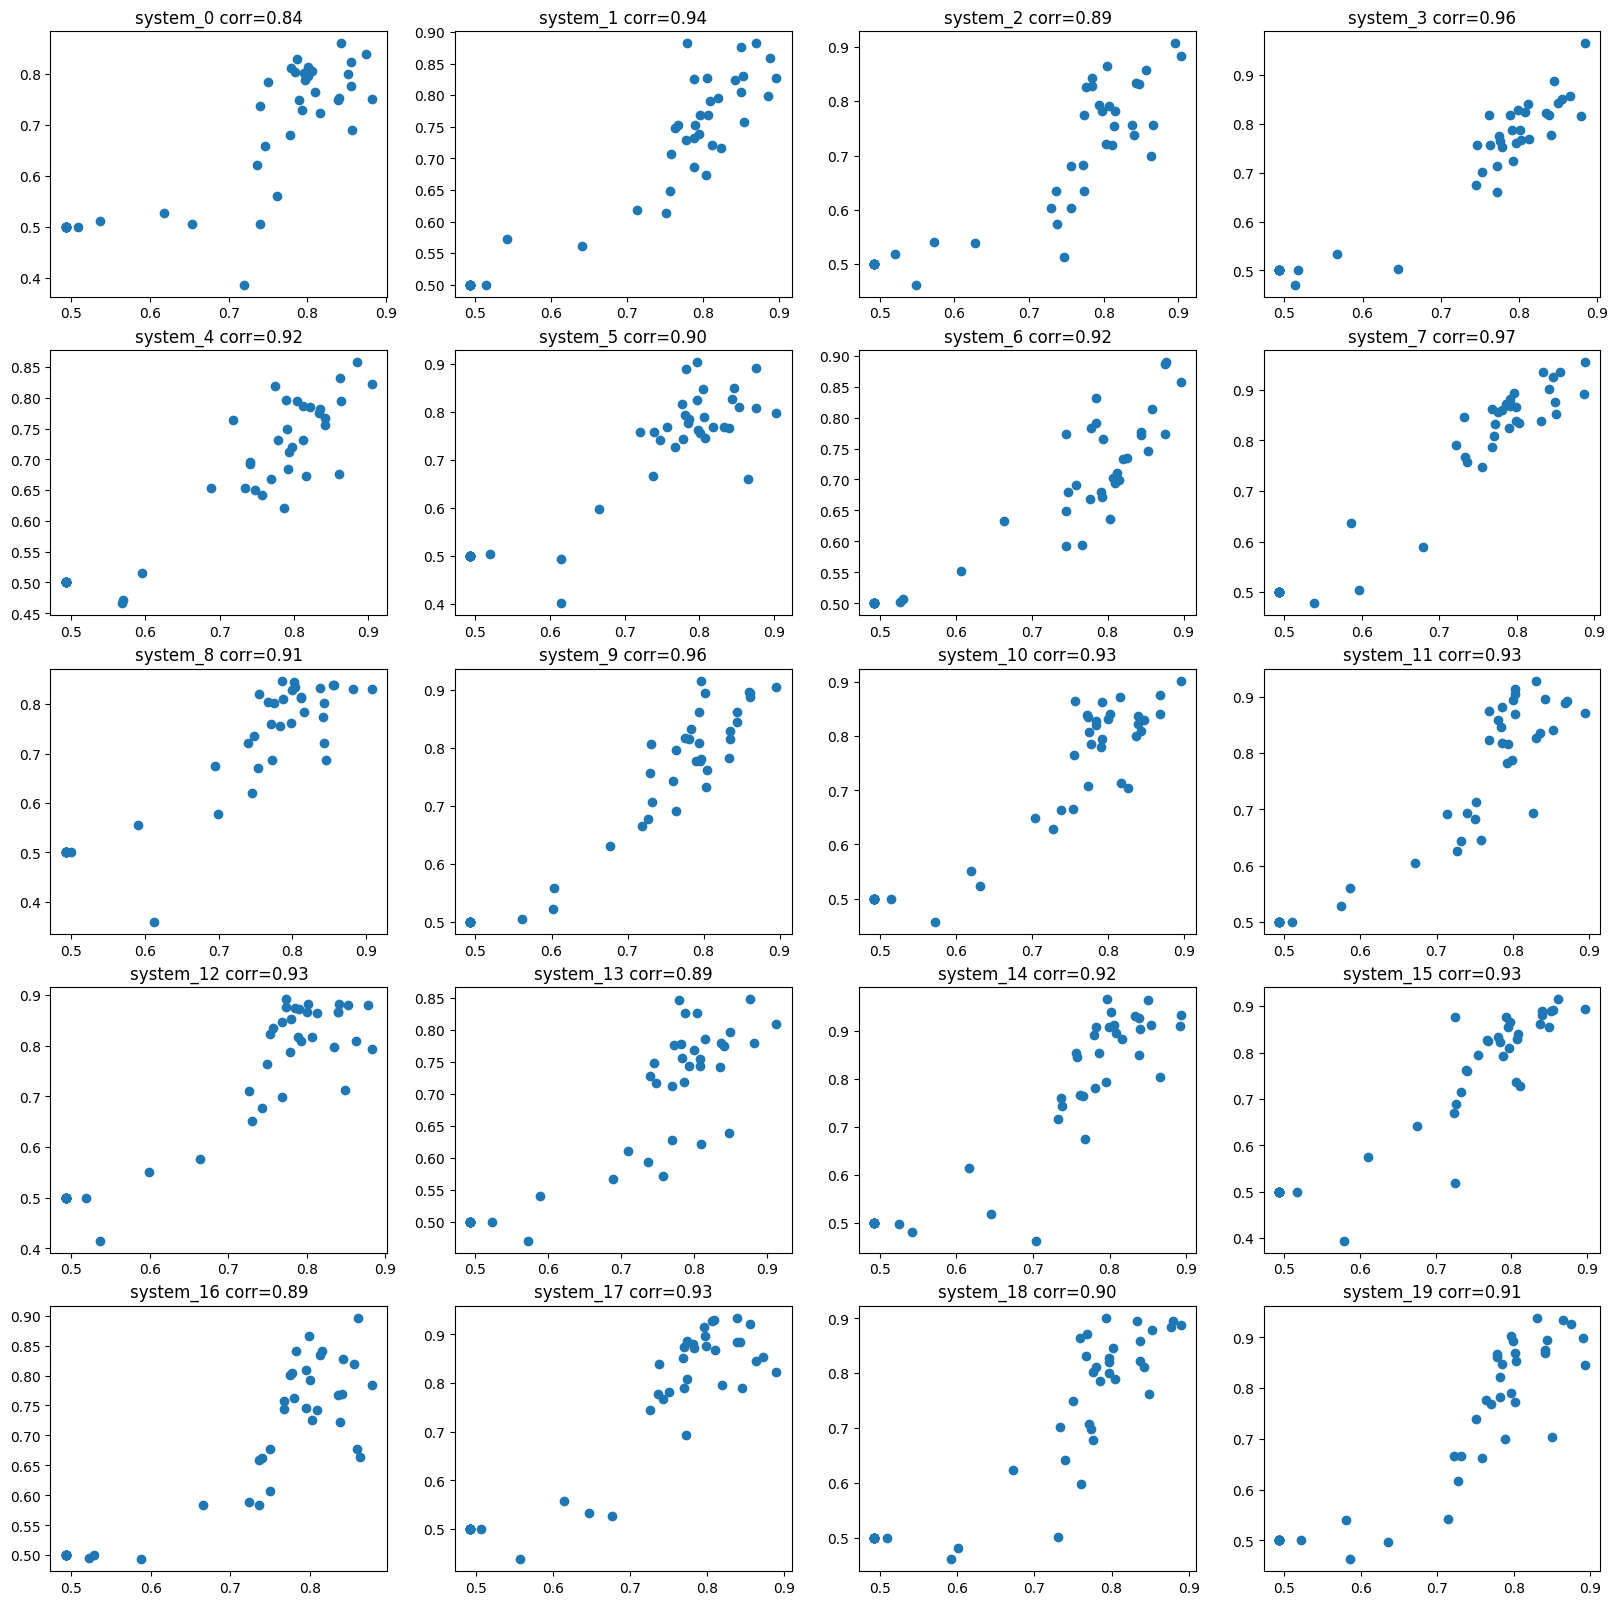

In [135]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=(20,20))
corr_list = []
for i in range(20):
    ax[i//4,i%4].scatter(df_s[i][:,1],df_s[i][:,4])
    # in title add the correlation between the two columns
    corr  = np.corrcoef(df_s[i][:,1],df_s[i][:,4])[0,1]
    ax[i//4,i%4].set_title(f'system_{i} corr={corr:.2f}')
    corr_list.append(corr)

# print the mean correlation
print(f'mean correlation = {np.mean(corr_list):.2f}')


mean correlation = 0.92


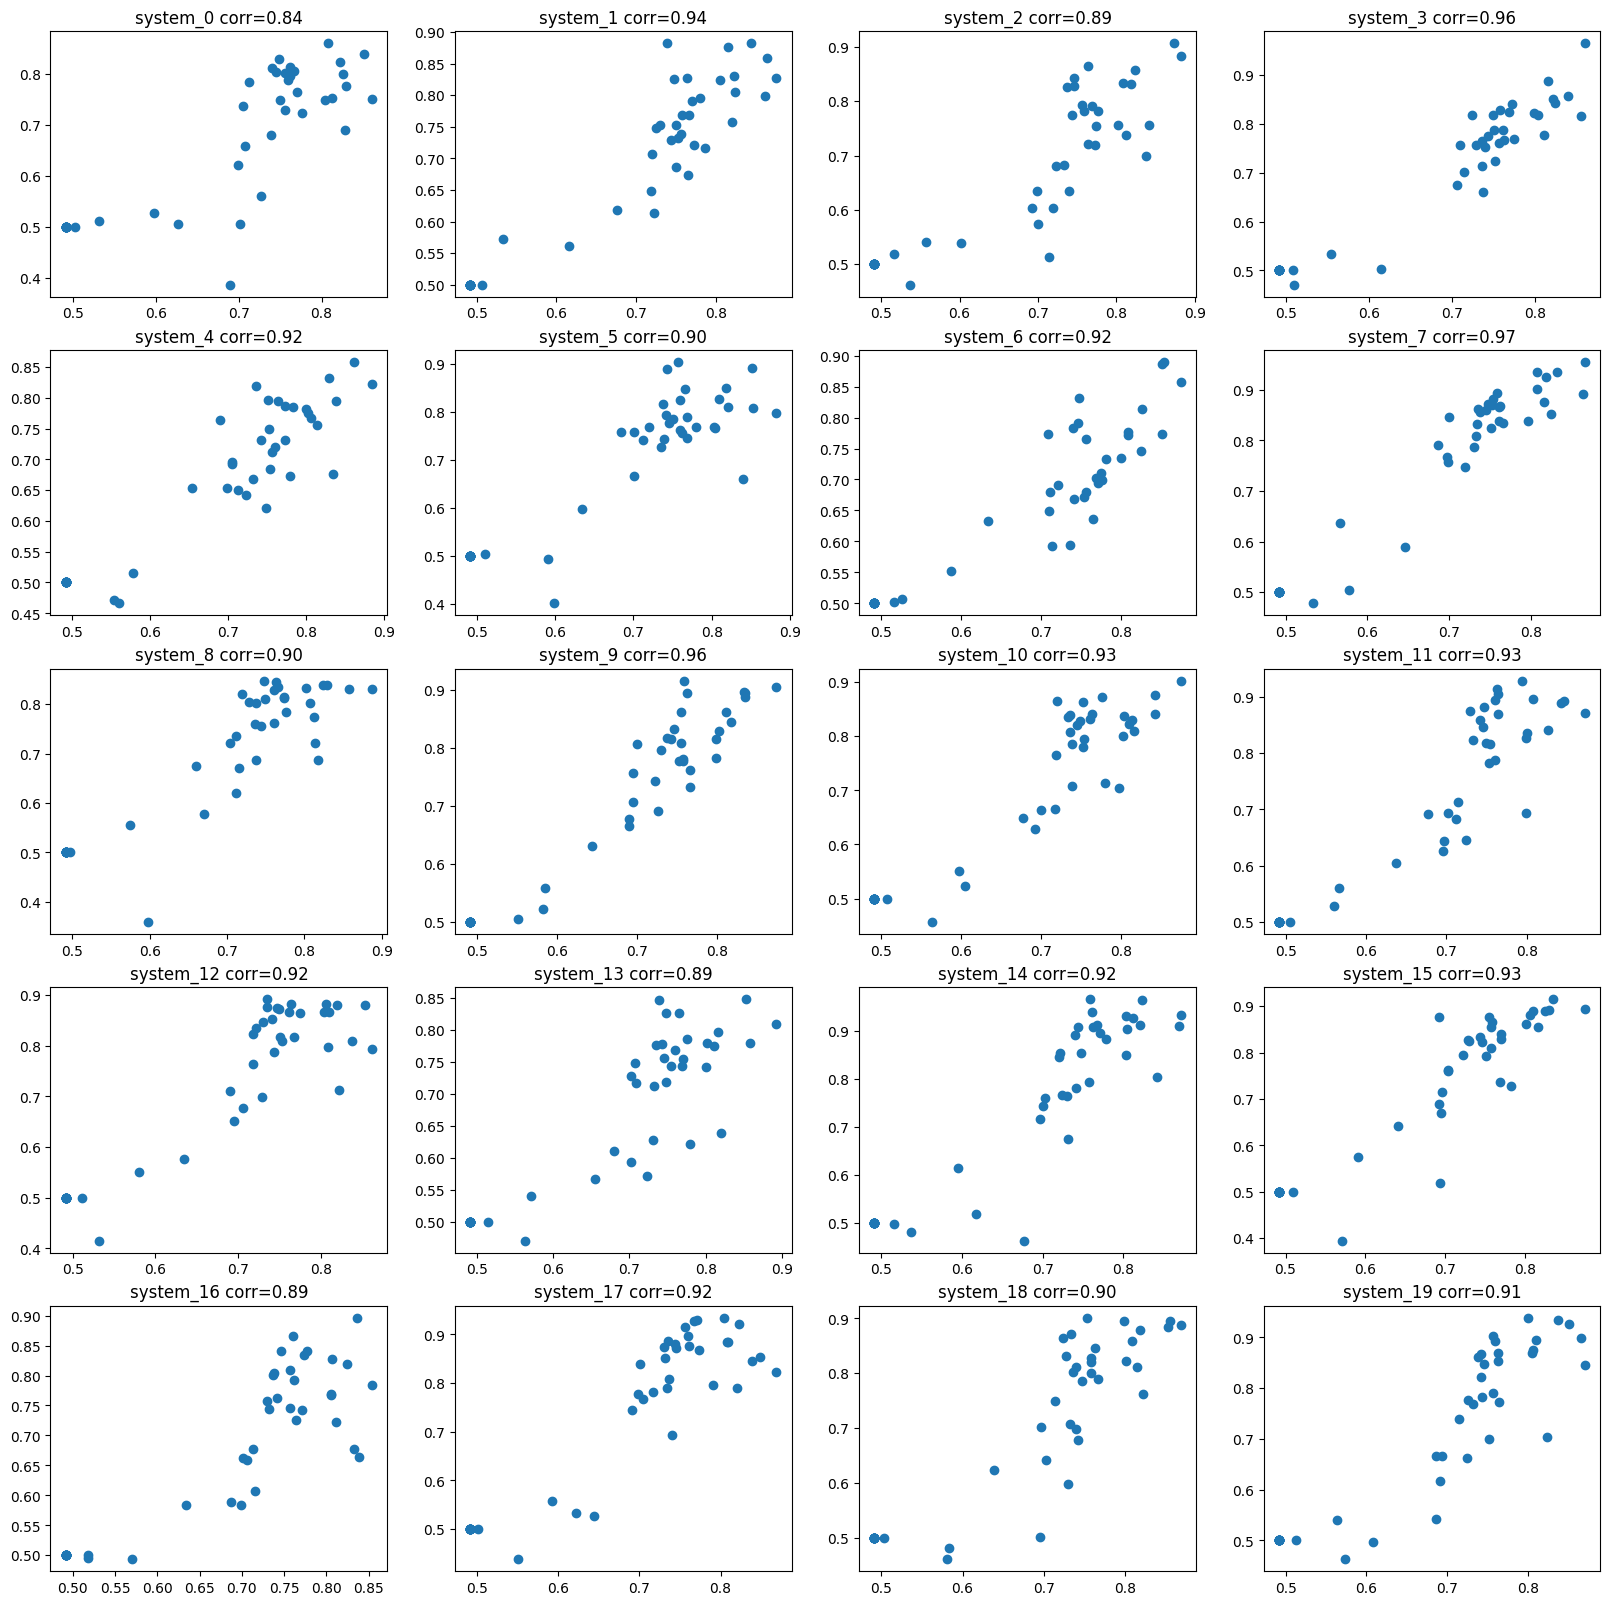

In [136]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=(20,20))
corr_list = []
for i in range(20):
    ax[i//4,i%4].scatter(df_s[i][:,2],df_s[i][:,4])
    # in title add the correlation between the two columns
    corr  = np.corrcoef(df_s[i][:,2],df_s[i][:,4])[0,1]
    ax[i//4,i%4].set_title(f'system_{i} corr={corr:.2f}')
    corr_list.append(corr)

# print the mean correlation
print(f'mean correlation = {np.mean(corr_list):.2f}')


mean correlation = 0.94


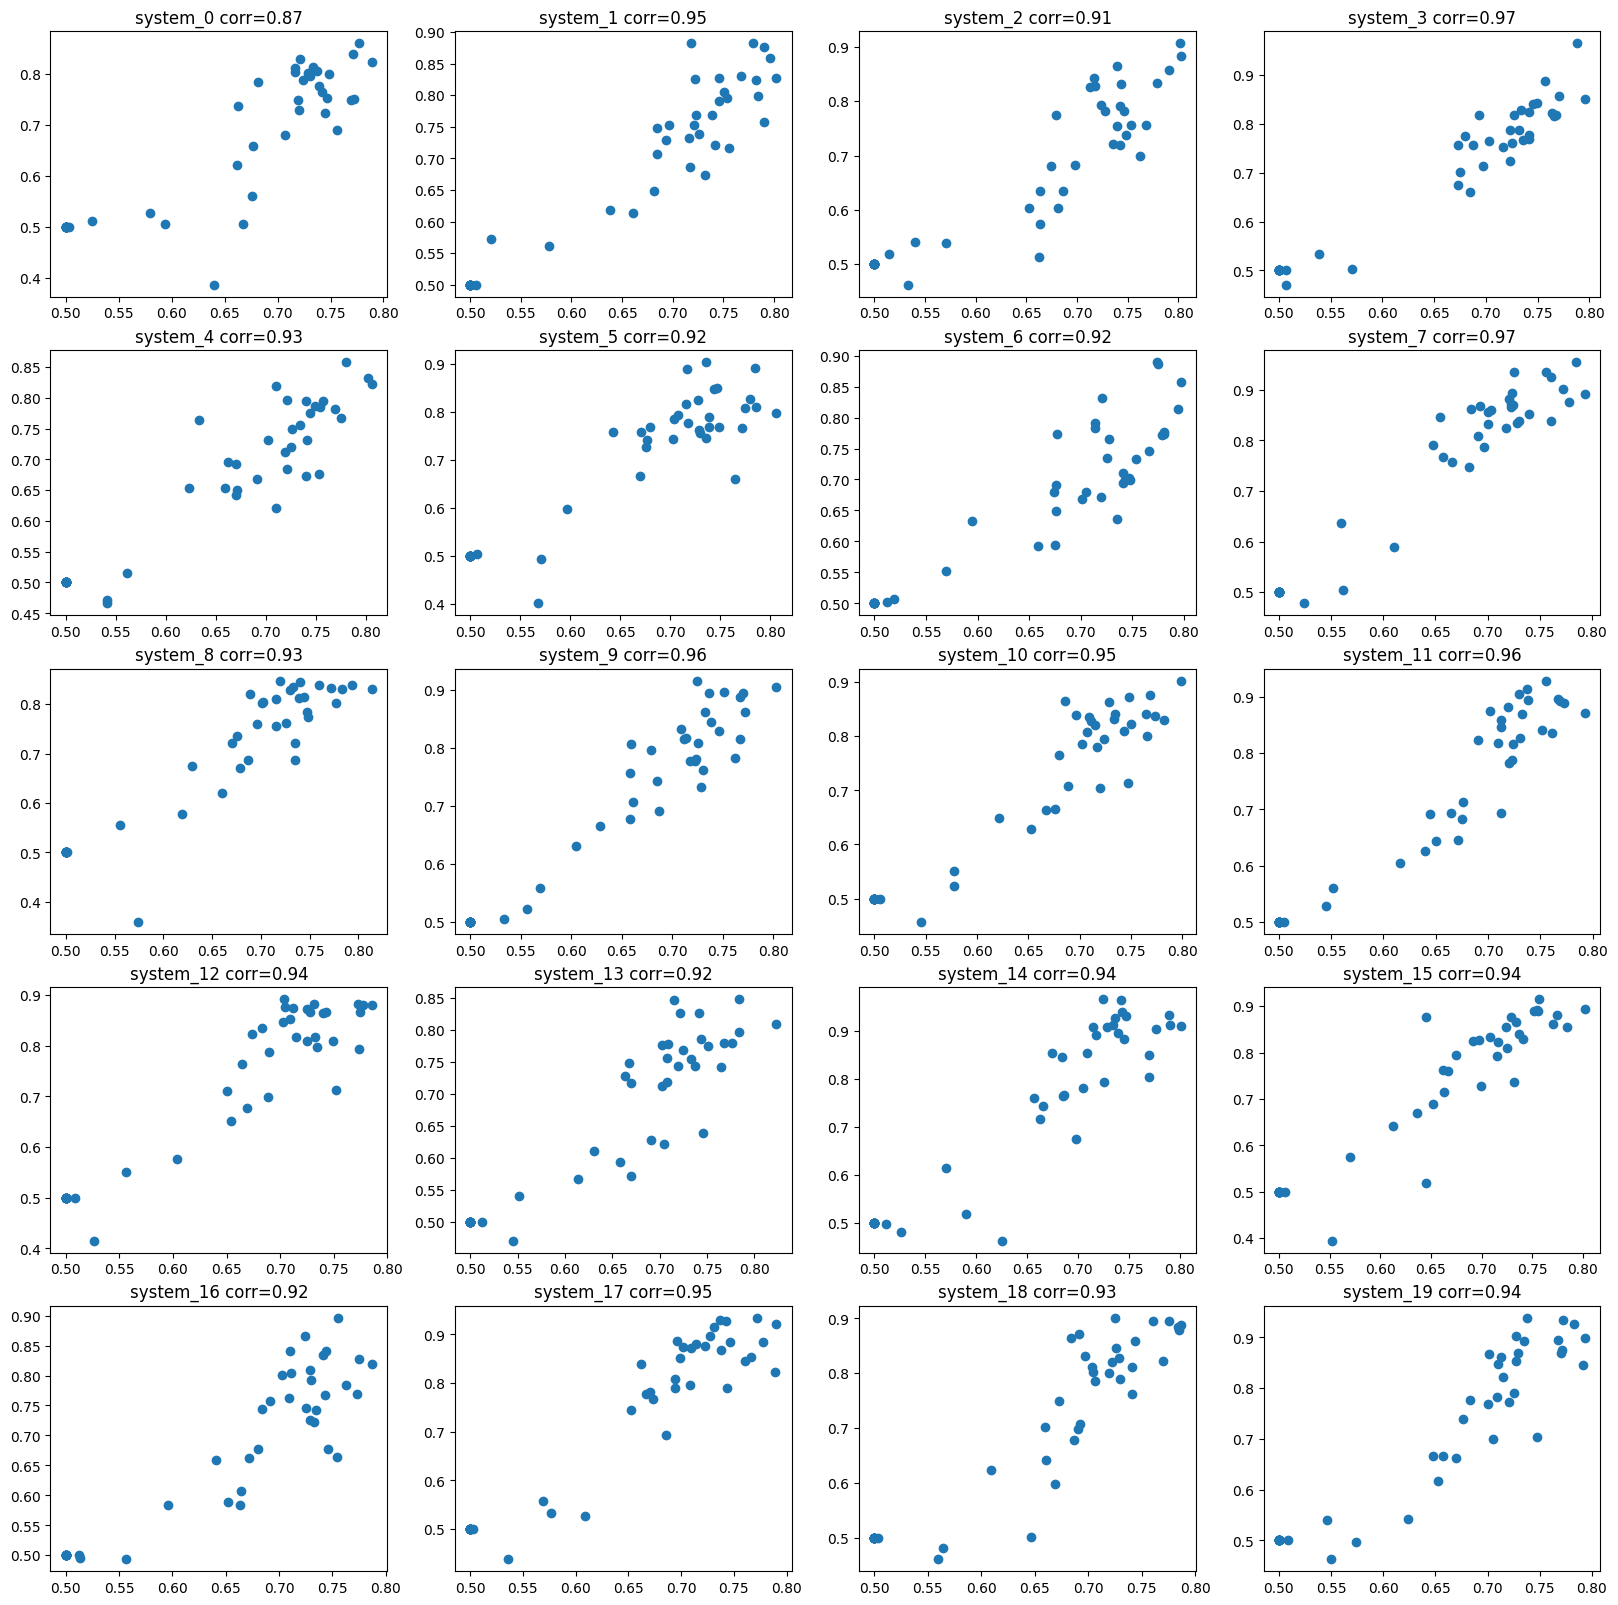

In [137]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=(20,20))
corr_list = []
for i in range(20):
    ax[i//4,i%4].scatter(df_s[i][:,3],df_s[i][:,4])
    # in title add the correlation between the two columns
    corr  = np.corrcoef(df_s[i][:,3],df_s[i][:,4])[0,1]
    ax[i//4,i%4].set_title(f'system_{i} corr={corr:.2f}')
    corr_list.append(corr)

# print the mean correlation
print(f'mean correlation = {np.mean(corr_list):.2f}')


In [139]:
# re-order df_s according the the auc_0.03 column
df_s_sorted = []
for df in df_s:
    df_s_sorted.append(df[np.argsort(df[:,4])])


mean correlation = nan


Text(0, 0.5, 'real_anomaly_auc_all_systems')

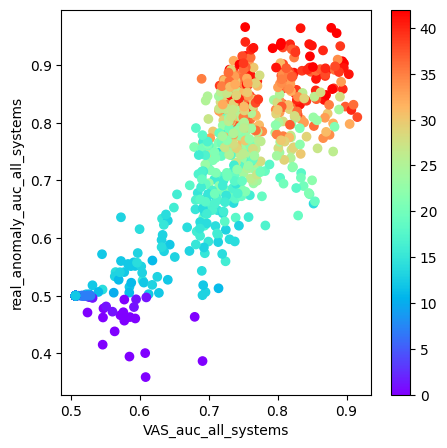

In [143]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(5,5))
corr_list = []
for i in range(20):
    p= ax.scatter(df_s_sorted[i][:,0],df_s_sorted[i][:,4],c=df_s[i][:,5],cmap='rainbow')
# add colorbar
fig.colorbar(p, ax=ax)
# print the mean correlation
print(f'mean correlation = {np.mean(corr_list):.2f}')
ax.set_xlabel('VAS_auc_all_systems')
ax.set_ylabel('real_anomaly_auc_all_systems')